In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
#plt.imshow(star)

def plotarray(x):
    fig = plt.figure(figsize=(6, 3.2))

    ax = fig.add_subplot(111)
    ax.set_title('colorMap')
    plt.imshow(x)
    ax.set_aspect('equal')

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.patch.set_alpha(0)
    cax.set_frame_on(False)
    plt.colorbar(orientation='vertical')
    plt.show()


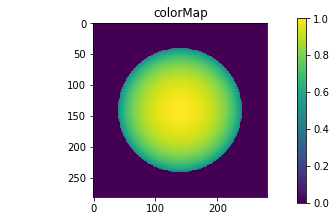

In [8]:
a=100
rp=20


star = np.zeros((2*a+1+4*rp,2*a+1+4*rp), dtype=np.float64)

for i in range(-a,a):
    for j in range(-a,a):
        if (i**2 + j**2)>a**2:
            star[[i+a+2*rp],[j+a+2*rp]] = 0
        else:
            I = 1-0.6096*(1-np.sqrt((a**2 - (i**2 + j**2))/a**2))
            star[[i+a+2*rp],[j+a+2*rp]] = I
            
plotarray(star)

In [9]:
planet = np.ones_like(star, dtype=np.bool)

In [10]:
for i in range(-rp,rp):
    for j in range(-rp,rp):
            if (i**2 + j**2)>rp**2:
                planet[[i+rp+a],[j+rp]] = True
            else:
                planet[[i+rp+a],[j+rp]] = False

In [11]:
def shift_planet(shape, rp, x, y=None):
    """Shift planet with radius rp to position x, y.
    
    Arguments
    ---------
    shape : (NX, NY)
         size of star array in pixels (array indices)
    rp : float
        radius (in pixels)
    x : float
        position in pixels
    y : float
        position in pixels, default is at half, NY/2
    """
    NX, NY = shape
    if y is None:
        y = NY/2
        
    planet = np.zeros(shape, dtype=np.bool)
    for i in range(-rp,rp):
        for j in range(-rp,rp):
            ix = round(i+rp + x)
            jy = round(j+rp + y)
            if 0 < ix < NX and 0 < jy < NY:
                planet[ix, jy] = (i**2 + j**2 > rp**2)
    return planet            
    

In [15]:
planet_positions = []
for x in range(0, 80):
    #planet_positions.append(shift_planet(star.shape, rp, x))
    planc = planet_positions.append(shift_planet(star.shape, rp, x))
    planet_ma = np.ma.masked_array(np.ones(planet.shape), mask=planc)


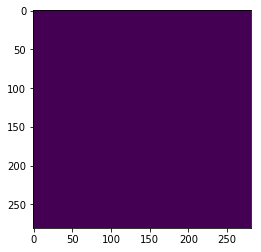

In [16]:
#plt.imshow(planet_positions[30].T)
plt.imshow(star)
plt.imshow(planet_ma)

In [ ]:
planet_ma = np.ma.masked_array(np.ones(planet.shape), mask=planet)

In [ ]:
plt.imshow(star)
plt.imshow(planet_ma)

In [26]:
plt.imshow?

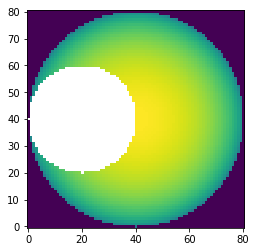

In [161]:
plt.imshow(np.ma.masked_array(star, mask=np.logical_not(planet)), origin="lower")

In [116]:
star[planet].sum()

2926.3264398866318

In [152]:
star[planet].shape

(5306,)

In [117]:
star.sum()

4003.3295539444175

In [147]:
star_punched = np.ma.masked_array(star, mask=np.logical_not(planet))
star_punched.sum()

2926.3264398866313

In [150]:
star_punched.shape

(81, 81)

In [156]:
(~star_punched.mask).sum()

5306